# Приближенное решение краевой задачи для обыкновенного дифференциального уравнения

## Вариант 6

> <span style="font-style:normal; font-size:12pt;"> 
    <p>Найти приближенное решение краевой задачи для обычновенного дифференциального уравнения на отрезке [0, 1] с шагом h = 0.05. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности.</p>
    <p> Для сравнения приведено точное решение u0(x) </p>
    
$$
\begin{equation}
u'' + \frac{2x}{1+x^2}u' + \frac{2xtgx}{1+x^2}u = \frac{2xtgx}{1+x^2}arctgx - cosx, \\
u(0) = 1, \\ u(1) + 2u'(1) = 0.6428, \\ u_0(x) = cosx + arctgx \\
\end{equation}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# ПОМЕНЯЛ ЗНАК!!!

# Вычисление констант СЛАУ (апроксимация)
def SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, bc_precision=1):
    
    if bc_precision != 1 and bc_precision != 2:
        return
    
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]
    
    a_plot = []
    b_plot = []
    c_plot = []
    f_plot = []
    
    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = (-1) * beta2 / h
    bn = alpha2 + beta2 / h
    fn = gamma2

    if bc_precision == 2:
        if beta1 != 0 and beta2 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * h**2 * alpha1 / beta1 + q(x_plot[0]) * h**2
            c0 = 2
            f0 = f(x_plot[0]) * h**2 + 2 * gamma1 * h / beta1 - p(x_plot[0]) * h**2 * gamma1 / beta1

            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * h**2 * alpha2 / beta2 + q(x_plot[n - 1]) * h**2
            fn = f(x_plot[n - 1]) * h**2 - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * h**2 * gamma2 / beta2)
        
        elif beta1 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * h**2 * alpha1 / beta1 + q(x_plot[0]) * h**2
            c0 = 2
            f0 = f(x_plot[0]) * h**2 + 2 * gamma1 * h / beta1 - p(x_plot[0]) * h**2 * gamma1 / beta1
            
        elif beta2 != 0:
            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * h**2 * alpha2 / beta2 + q(x_plot[n - 1]) * h**2
            fn = f(x_plot[n - 1]) * h**2 - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * h**2 * gamma2 / beta2)


    b_plot.append(b0)
    c_plot.append(c0)
    f_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        f_plot.append(fk)

    a_plot.append(an)
    b_plot.append(bn)
    f_plot.append(fn)
    
    return a_plot, b_plot, c_plot, f_plot

In [3]:
# Метод прогонки для решения СЛАУ
def Thomas_algorithm(a_plot, b_plot, c_plot, f_plot):
    n1 = len(f_plot) - 1
    y_plot = []
        
        
    A_plot = []
    B_plot = []
    C_plot = []
    
    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = f_plot[0] / b_plot[0]
    
    An = 0
    
    
    A_plot.append(A0)
    B_plot.append(B0)
    
    for i in range(1, n1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i - 1] * A_plot[i - 1])
        A_plot.append(Ai)
    
    for i in range(1, n1 + 1):
        Bi = (f_plot[i] - a_plot[i - 1] * B_plot[i - 1]) / (b_plot[i] + a_plot[i - 1] * A_plot[i - 1])
        B_plot.append(Bi)
    
    A_plot.append(An)    
    
    
    y_plot.append(B_plot[n1])
    
    for i in range(n1 - 1, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)
    
    return y_plot

### Исходные данные

In [4]:
# РЕШАЕМ КРАЕВУЮ ЗАДАЧУ ДЛЯ ОДУ ВТОРОГО ПОРЯДКА

def p(x):
    return 2 * x / (1 + x**2)

def q(x):
    return 2* x * np.tan(x) / (1 + x**2)

def f(x):
    return 2 * x * np.tan(x) / (1 + x**2) * np.arctan(x) - np.cos(x)

# точное решение для анализа
def u(x):
    return np.cos(x) + np.arctan(x)

alpha1 = 1
alpha2 = 1

beta1 = 0
beta2 = 2

gamma1 = 1
gamma2 = 0.6428

# интервал
a = 0
b = 1

In [5]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(a, b, round((b - a) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


##### Краевые условия 1 и 2 порядков точности

In [6]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

### Численное решение

In [7]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

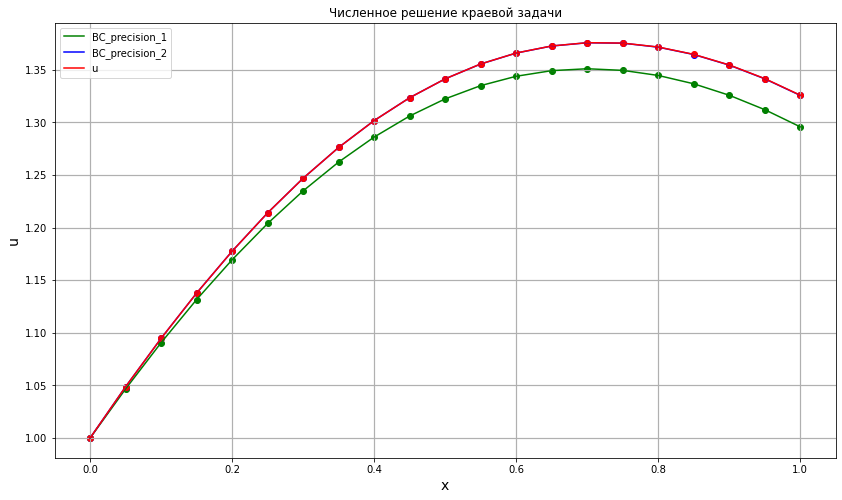

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [9]:
d = {'x_plot': x_plot, 'y1_plot': y1_plot, 'y2_plot': y2_plot, 'u_plot': u_plot}

df = pd.DataFrame(d)
df

,x_plot,y1_plot,y2_plot,u_plot
0,0.00,1.000000,1.000000,1.000000
1,0.05,1.046654,1.048715,1.048709
2,0.10,1.090574,1.094684,1.094673
3,0.15,1.131536,1.137676,1.137661
4,0.20,1.169340,1.177480,1.177462
5,0.25,1.203809,1.213909,1.213891
6,0.30,1.234798,1.246809,1.246793
7,0.35,1.262193,1.276059,1.276048
8,0.40,1.285916,1.301572,1.301567
9,0.45,1.305923,1.323296,1.323301


#### Точность алгоритмов

In [10]:
# количество узлов сетки

node_min_count = 2
node_max_count = 100

In [11]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(a, b, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
    
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [12]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df

,h_plot,errors_plot1,errors_plot2
0,1.000000,0.444767,0.151333
1,0.090909,0.052799,0.000743
2,0.047619,0.028704,0.000185
3,0.032258,0.019713,0.000071
4,0.024390,0.015010,0.000030
5,0.019608,0.012117,0.000012
6,0.016393,0.010158,0.000013
7,0.014085,0.008743,0.000014
8,0.012346,0.007674,0.000015
9,0.010989,0.006837,0.000016


In [13]:
ln_h_plot       = np.log(h_plot[:-3])
ln_errors_plot1 = np.log(errors_plot1[:-3])
ln_errors_plot2 = np.log(errors_plot2[:-3])

##### МНК для линейной регрессии

In [14]:
ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order   = [0, 0]

for b_index in range(len(b_order)):
    
    for index in range(len(ln_h_plot)):
        b_order[b_index] += ln_h_plot[index] * ln_errors[b_index][index]
    b_order[b_index] *= len(ln_h_plot)
        
    b_order[b_index] -= (np.sum(ln_h_plot) * np.sum(ln_errors[b_index]))
    b_order[b_index] /= (len(ln_h_plot) * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))

b_order

[0.9180232724285989, 2.3242053778153076]

##### График ошибок

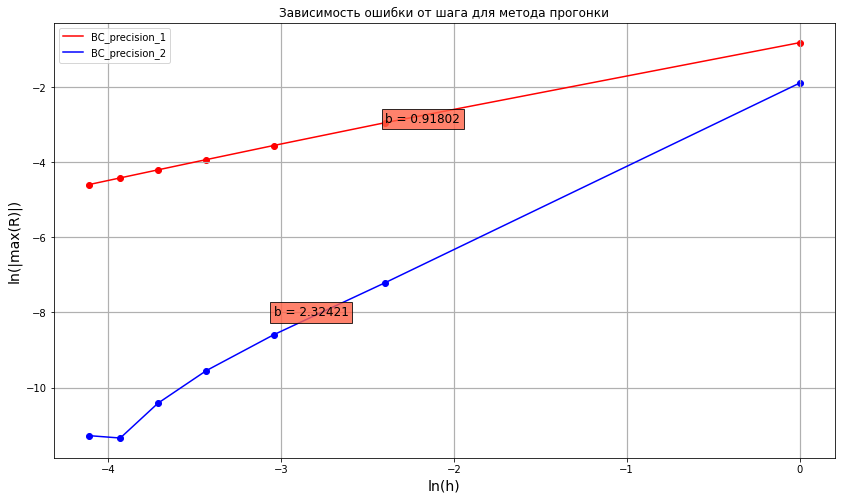

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[1], ln_errors_plot1[1], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot,    ln_errors_plot2, color="blue")
ax.plot   (ln_h_plot,    ln_errors_plot2, color="blue", label='BC_precision_2')
plt.text  (ln_h_plot[2], ln_errors_plot2[2] + 0.5, "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()

#### Доп.условие

> <span style="font-style:normal; font-size:12pt;"> 
    <p>Найти приближенное решение краевой задачи для обычновенного дифференциального уравнения на отрезке [0, 1] с шагом h = 0.05. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности.</p>
    <p> Для сравнения приведено точное решение u0(x) </p>
    
$$
\begin{equation}
u'' + \frac{2x}{1+x^2}u' + \frac{2xtgx}{1+x^2}u = \frac{2xtgx}{1+x^2}arctgx - cosx, \\
u'(0) = 1, \\ u(1) + 2u'(1) = 0.6428, \\ u_0(x) = cosx + arctgx \\
\end{equation}
$$

##### Краевые условия 1 и 2 порядка точности

In [16]:
# Краевое условие при 0 первого порядка точности
# Краевое условие при l второго порядка точности

def SLE_constants_(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f):
    
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]

    a3_plot = []
    b3_plot = []
    c3_plot = []
    f3_plot = []

    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = 2
    bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * h**2 * alpha2 / beta2 + q(x_plot[n - 1]) * h**2
    fn = f(x_plot[n - 1]) * h**2 - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * h**2 * gamma2 / beta2)


    b3_plot.append(b0)
    c3_plot.append(c0)
    f3_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a3_plot.append(ak)
        b3_plot.append(bk)
        c3_plot.append(ck)
        f3_plot.append(fk)


    a3_plot.append(an)
    b3_plot.append(bn)
    f3_plot.append(fn)
    
    return a3_plot, b3_plot, c3_plot, f3_plot

In [17]:
# изменения
alpha1 = 0
beta1  = 1

In [18]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(a, b, round((b - a) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [19]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
a3_plot, b3_plot, c3_plot, f3_plot = SLE_constants_(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f)

#### Численное решение

In [20]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
y3_plot = Thomas_algorithm(a3_plot, b3_plot, c3_plot, f3_plot)
u_plot  = [u(x) for x in x_plot]

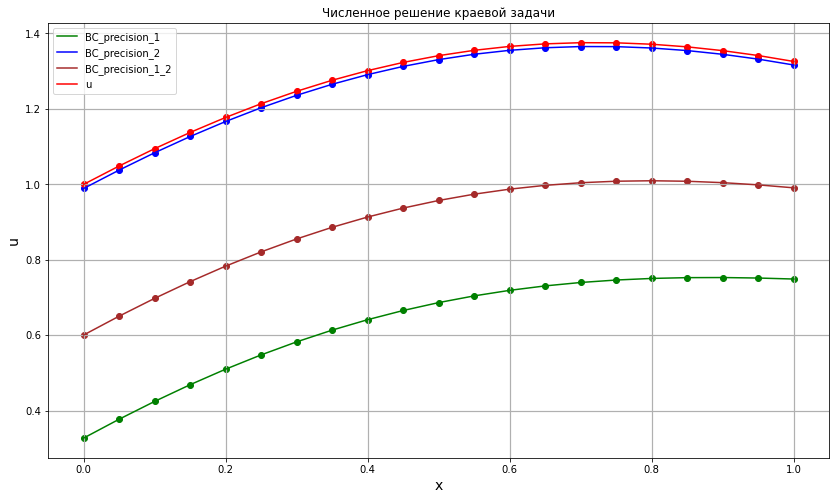

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, y3_plot, color="brown")
ax.plot   (x_plot, y3_plot, color="brown", label='BC_precision_1_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [22]:
d = {'x_plot': x_plot, 'y1_plot': y1_plot, 'y2_plot': y2_plot, 'u_plot': u_plot}

df = pd.DataFrame(d)
df

,x_plot,y1_plot,y2_plot,u_plot
0,0.00,0.327178,0.989088,1.000000
1,0.05,0.377178,1.037838,1.048709
2,0.10,0.424434,1.083843,1.094673
3,0.15,0.468734,1.126870,1.137661
4,0.20,0.509899,1.166709,1.177462
5,0.25,0.547793,1.203176,1.213891
6,0.30,0.582322,1.236115,1.246793
7,0.35,0.613436,1.265408,1.276048
8,0.40,0.641126,1.290969,1.301567
9,0.45,0.665428,1.312747,1.323301


#### Точность алгоритмов

In [23]:
# количество узлов сетки

node_min_count = 2
node_max_count = 100

In [24]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []
errors_plot3 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(a, b, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    a3_plot, b3_plot, c3_plot, f3_plot = SLE_constants_(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f)
        
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    y3_plot = Thomas_algorithm(a3_plot, b3_plot, c3_plot, f3_plot)
    u_plot  = [u(x) for x in x0_plot]
       
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    max_error3 = max([abs(y3 - u) for y3, u in zip(y3_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)
    errors_plot3.append(max_error3)

In [25]:
# print(errors_plot1)
# print(errors_plot2)
# print(errors_plot3)
# print(h_plot)
      
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2, 'errors_plot3': errors_plot3}

df = pd.DataFrame(d)
df

,h_plot,errors_plot1,errors_plot2,errors_plot3
0,1.000000,3.357200,11.193222,28.612481
1,0.090909,0.956508,0.037658,0.750141
2,0.047619,0.651720,0.009843,0.379815
3,0.032258,0.496940,0.004217,0.254398
4,0.024390,0.402031,0.002178,0.191218
5,0.019608,0.337681,0.001217,0.153144
6,0.016393,0.291124,0.000688,0.127688
7,0.014085,0.255859,0.000367,0.109468
8,0.012346,0.228214,0.000157,0.095783
9,0.010989,0.205958,0.000013,0.085126


In [26]:
ln_h_plot       = np.log(h_plot[:-5])
ln_errors_plot1 = np.log(errors_plot1[:-5])
ln_errors_plot2 = np.log(errors_plot2[:-5])
ln_errors_plot3 = np.log(errors_plot3[:-5])

##### МНК для линейной регрессии

In [27]:
ln_errors = [ln_errors_plot1, ln_errors_plot2, ln_errors_plot3]
b_order   = [0, 0, 0]

for b_index in range(len(b_order)):
    
    for index in range(len(ln_h_plot)):
        b_order[b_index] += ln_h_plot[index] * ln_errors[b_index][index]
    b_order[b_index] *= len(ln_h_plot)
        
    b_order[b_index] -= (np.sum(ln_h_plot) * np.sum(ln_errors[b_index]))
    b_order[b_index] /= (len(ln_h_plot) * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))

b_order

[0.5617311443334757, 2.2985942012743874, 1.3653209226356056]

##### График ошибок

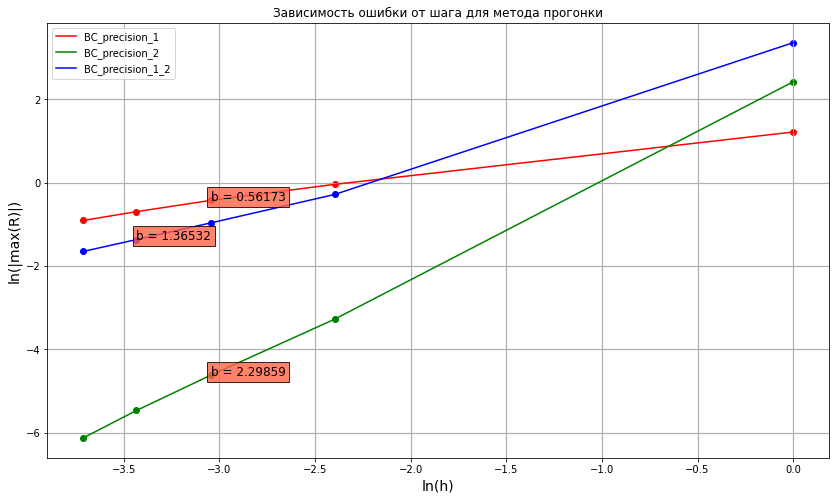

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[2], ln_errors_plot1[2], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot,    ln_errors_plot2, color="green")
ax.plot   (ln_h_plot,    ln_errors_plot2, color="green", label='BC_precision_2')
plt.text  (ln_h_plot[2], ln_errors_plot2[2], "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot,    ln_errors_plot3, color="blue")
ax.plot   (ln_h_plot,    ln_errors_plot3, color="blue", label='BC_precision_1_2')
plt.text  (ln_h_plot[3], ln_errors_plot3[3], "b = {0:.5f}".format(b_order[2]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()